In [1]:
# import libraries
from xgboost import XGBClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# rakamlar veri setini yükle
digits = load_digits()
X = digits.data
y = digits.target

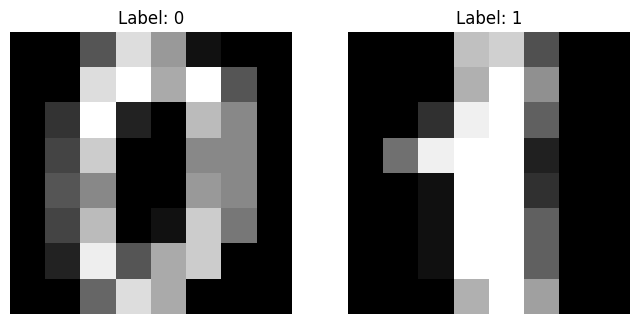

In [3]:
# örnek görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis("off")
plt.show()

In [4]:
# veriyi böl: train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# XGBoost modeli tanımlama
xgb_clf = XGBClassifier(
    n_estimators=150,         # ağaç sayısı
    learning_rate=0.05,       # öğrenme oranı
    max_depth=4,              # maksimum ağaç derinliği
    subsample=0.8,            # her ağacın verisinin %80'i ile eğitilmesi
    colsample_bytree=0.5,     # özelliklerin %50'si kullanılsın
    min_child_weight=3,       # yapraktaki min örnek sayısı
    gamma=0,                  # minimum kayıp iyileşmesi
    early_stopping_rounds=5,  # erken durdurma için
    eval_metric="mlogloss",   # çok sınıflı log loss değerlendirme metrik
    random_state=42,
    use_label_encoder=False   # uyarıları kapat
)

In [6]:
# training
xgb_clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# prediction
y_pred = xgb_clf.predict(X_test)

[0]	validation_0-mlogloss:2.16151
[1]	validation_0-mlogloss:2.03466
[2]	validation_0-mlogloss:1.92645
[3]	validation_0-mlogloss:1.82439
[4]	validation_0-mlogloss:1.73542
[5]	validation_0-mlogloss:1.65331
[6]	validation_0-mlogloss:1.58074
[7]	validation_0-mlogloss:1.50813
[8]	validation_0-mlogloss:1.44527
[9]	validation_0-mlogloss:1.38802
[10]	validation_0-mlogloss:1.33297
[11]	validation_0-mlogloss:1.27847
[12]	validation_0-mlogloss:1.23048
[13]	validation_0-mlogloss:1.18369
[14]	validation_0-mlogloss:1.14166
[15]	validation_0-mlogloss:1.09876
[16]	validation_0-mlogloss:1.06139
[17]	validation_0-mlogloss:1.02472
[18]	validation_0-mlogloss:0.98845
[19]	validation_0-mlogloss:0.95554
[20]	validation_0-mlogloss:0.92429
[21]	validation_0-mlogloss:0.89448
[22]	validation_0-mlogloss:0.86625
[23]	validation_0-mlogloss:0.84082
[24]	validation_0-mlogloss:0.81418
[25]	validation_0-mlogloss:0.78695
[26]	validation_0-mlogloss:0.76350
[27]	validation_0-mlogloss:0.74081
[28]	validation_0-mlogloss:0.7

c:\Users\AhmetD\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:26:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[33]	validation_0-mlogloss:0.62110
[34]	validation_0-mlogloss:0.60345
[35]	validation_0-mlogloss:0.58665
[36]	validation_0-mlogloss:0.57175
[37]	validation_0-mlogloss:0.55655
[38]	validation_0-mlogloss:0.54164
[39]	validation_0-mlogloss:0.52729
[40]	validation_0-mlogloss:0.51465
[41]	validation_0-mlogloss:0.50194
[42]	validation_0-mlogloss:0.48934
[43]	validation_0-mlogloss:0.47687
[44]	validation_0-mlogloss:0.46477
[45]	validation_0-mlogloss:0.45373
[46]	validation_0-mlogloss:0.44324
[47]	validation_0-mlogloss:0.43278
[48]	validation_0-mlogloss:0.42298
[49]	validation_0-mlogloss:0.41256
[50]	validation_0-mlogloss:0.40365
[51]	validation_0-mlogloss:0.39426
[52]	validation_0-mlogloss:0.38543
[53]	validation_0-mlogloss:0.37712
[54]	validation_0-mlogloss:0.36906
[55]	validation_0-mlogloss:0.36064
[56]	validation_0-mlogloss:0.35283
[57]	validation_0-mlogloss:0.34601
[58]	validation_0-mlogloss:0.33918
[59]	validation_0-mlogloss:0.33238
[60]	validation_0-mlogloss:0.32568
[61]	validation_0-ml

In [7]:
# evaluation: accuracy, classification report
print(f"XGBoost Classifier Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"XGBoost Classifier classification_report: \n{classification_report(y_test, y_pred)}")


XGBoost Classifier Accuracy: 0.9694444444444444
XGBoost Classifier classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

